<a href="https://colab.research.google.com/github/rachocr/CCADMACL_PROJECT_COM222/blob/main/HIERARCHICAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [36]:
data = pd.read_csv('steam.csv')

In [37]:
data = data.dropna()

In [38]:
data.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [50]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold (e.g., 0.01)
selector = VarianceThreshold(threshold=0.01)
selected_features = selector.fit_transform(data.select_dtypes(include=['number']))

# Get selected feature names
selected_feature_names = data.select_dtypes(include=['number']).columns[selector.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['appid', 'english', 'required_age', 'achievements', 'positive_ratings',
       'negative_ratings', 'average_playtime', 'median_playtime', 'price'],
      dtype='object')


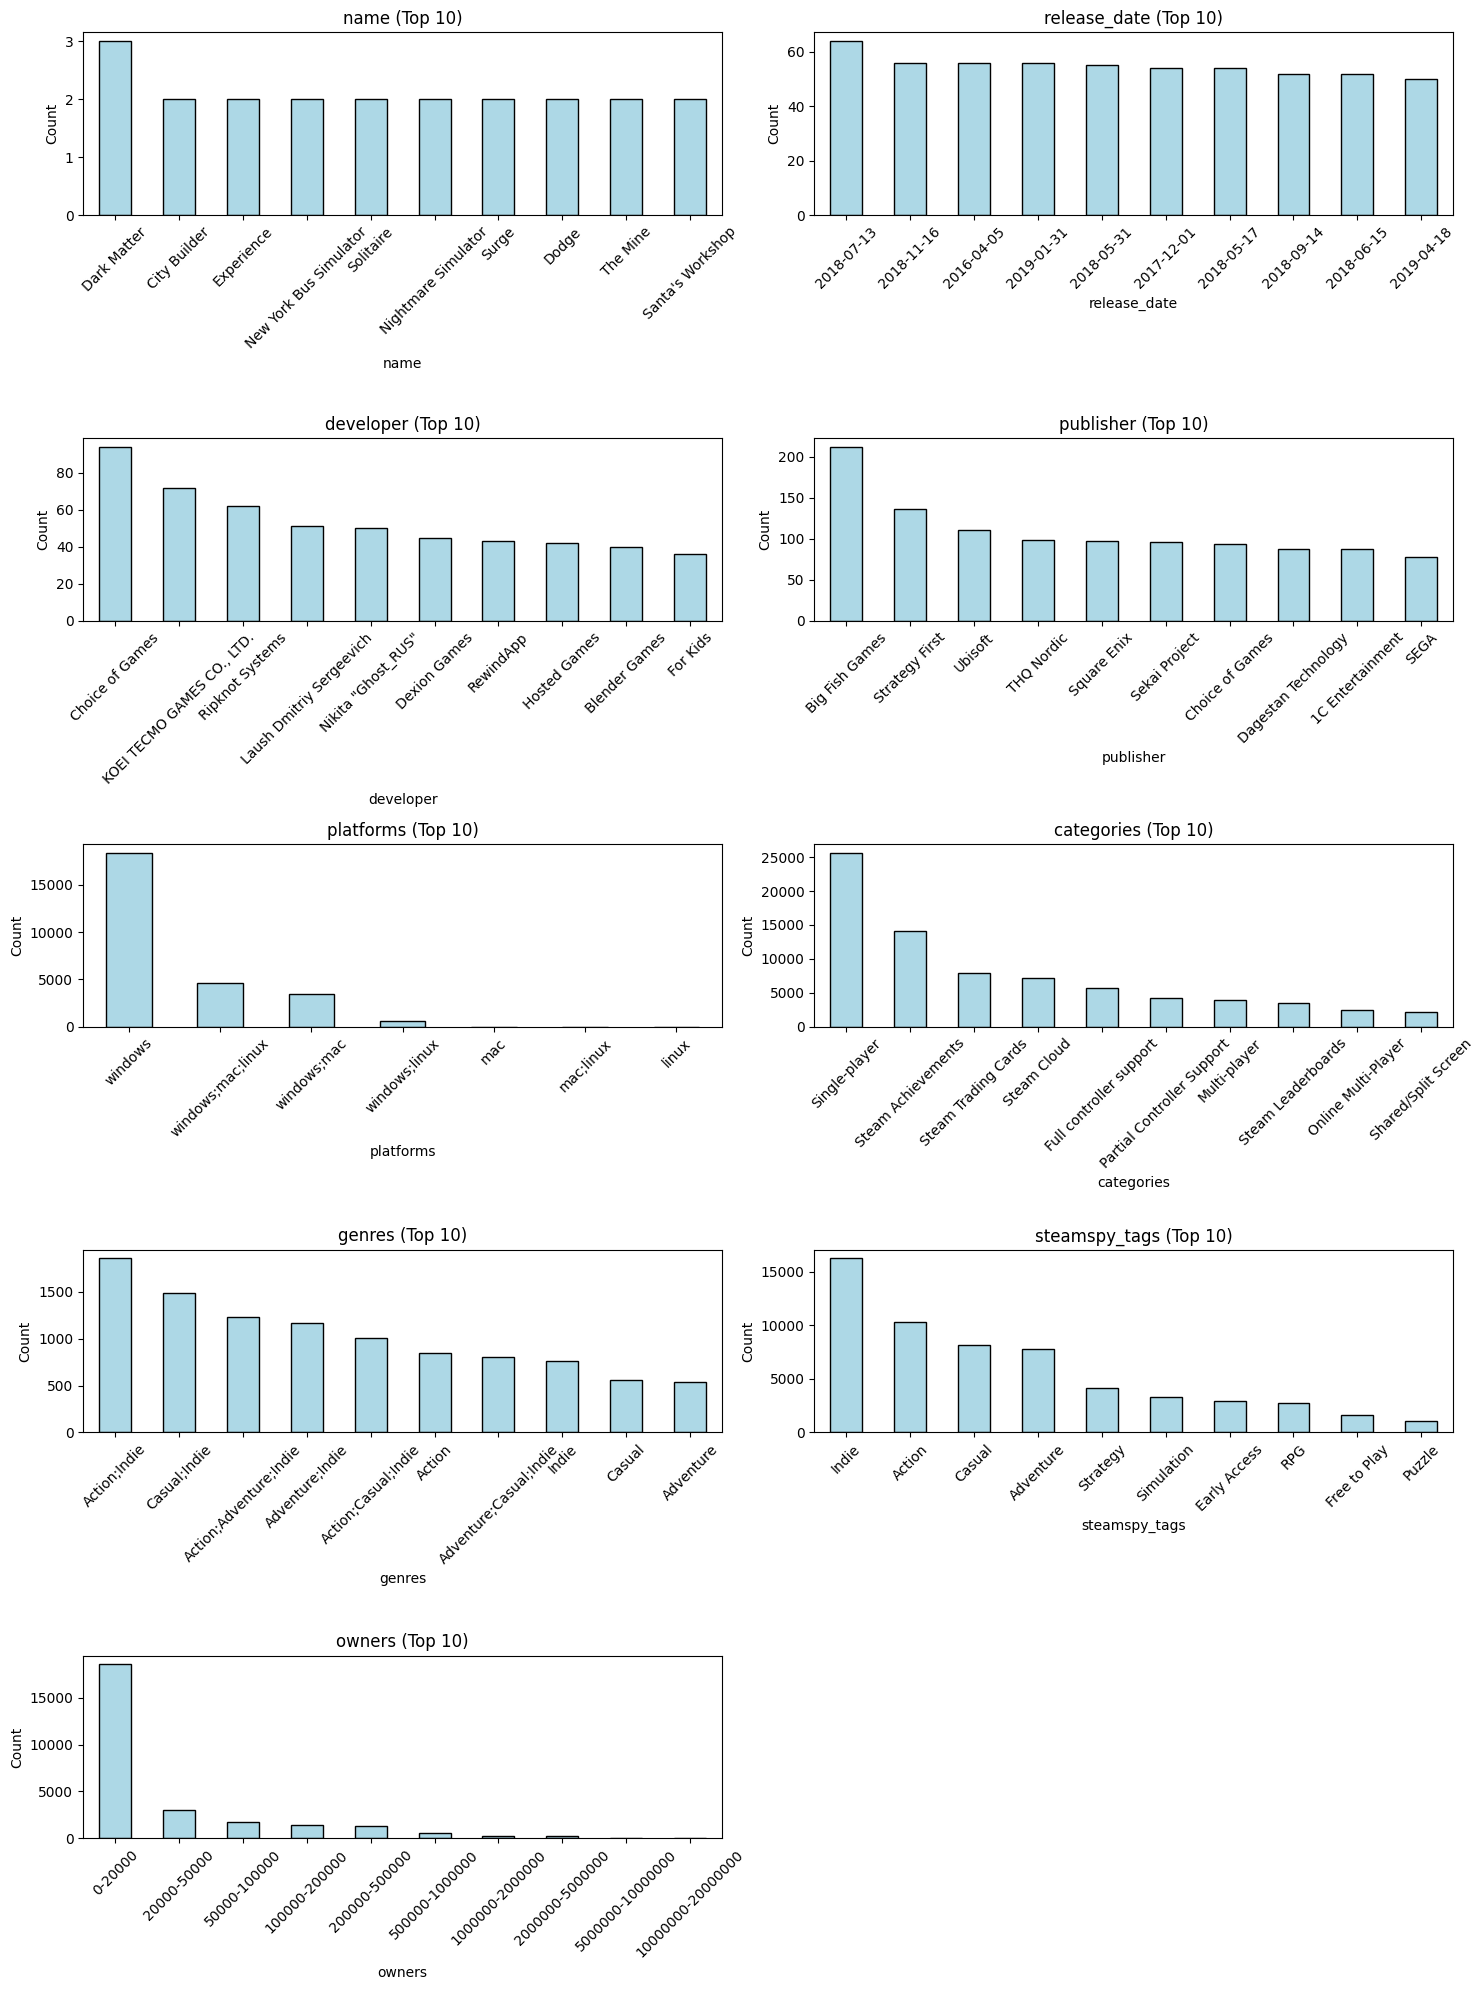

In [39]:
import matplotlib.pyplot as plt
import math

# Select categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Define grid layout: 2 columns, dynamically adjust rows
num_plots = len(categorical_features)
cols = 2  # Number of columns
rows = math.ceil(num_plots / cols)  # Calculate number of rows

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust figure size
axes = axes.flatten()  # Flatten in case of 1D array

for i, feature in enumerate(categorical_features):
    ax = axes[i]  # Select subplot
    # Fill missing values with 'Unknown'
    data[feature] = data[feature].fillna('Unknown')

    # For columns with multiple categories (semicolon-separated), explode the lists
    if feature in ['categories', 'steamspy_tags']:
        # Split each string by ';' (unless it's 'Unknown') and then explode the lists
        exploded_series = data[feature].apply(lambda x: x.split(';') if x != 'Unknown' else ['Unknown'])
        exploded_series = exploded_series.explode()
        top_values = exploded_series.value_counts().nlargest(10)
    else:
        top_values = data[feature].value_counts().nlargest(10)

    # Plot the top 10 most frequent values as a bar chart
    top_values.plot(kind='bar', color='lightblue', edgecolor='black', ax=ax)

    ax.set_title(f'{feature} (Top 10)', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [40]:
genres_encoded = data['genres'].str.get_dummies(sep=';')
owner_encoded = data['owners'].str.get_dummies()
#data['positive_ratings'] = np.log1p(data['positive_ratings'])
features = ['positive_ratings', 'negative_ratings']
data_Hierarchical = pd.concat([data[features], genres_encoded, data['name']], axis=1)

In [41]:
columns_to_check = ['Accounting','Animation & Modeling', 'Audio Production', 'Design & Illustration', 'Documentary', 'Early Access', 'Education', 'Game Development', 'Photo Editing'
, 'Software Training', 'Tutorial', 'Utilities', 'Video Production', 'Web Publishing']
# Loop through the columns and drop rows where the value is 1
for column in columns_to_check:
    data_Hierarchical = data_Hierarchical[data_Hierarchical[column] != 1]

data_Hierarchical = data_Hierarchical.drop(columns_to_check , axis=1)


In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_Hierarchical.drop(['name'], axis=1))


In [43]:
#linked = linkage(scaled_data, method='ward')

In [44]:
num_clusters = 7
agg_clust = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
data_Hierarchical['Cluster'] = agg_clust.fit_predict(scaled_data)

In [45]:
# Print the resulting clusters
for cluster_id in range(num_clusters):
    print(f"Games in Cluster {cluster_id}:")
    cluster_games = data_Hierarchical[data_Hierarchical['Cluster'] == cluster_id]['name']
    print(cluster_games.head(), "\n")



Games in Cluster 0:
0               Counter-Strike
1        Team Fortress Classic
2                Day of Defeat
3           Deathmatch Classic
4    Half-Life: Opposing Force
Name: name, dtype: object 

Games in Cluster 1:
81                   FlatOut 2™
82                  Xpand Rally
84           Xpand Rally Xtreme
123        RACE - The WTCC Game
124    RACE: Caterham Expansion
Name: name, dtype: object 

Games in Cluster 2:
25       Counter-Strike: Global Offensive
12836       PLAYERUNKNOWN'S BATTLEGROUNDS
Name: name, dtype: object 

Games in Cluster 3:
132     Company of Heroes - Legacy Edition
473                      Penumbra Overture
778                                  Mafia
1430                    Zombie Playground™
1468                                Lucius
Name: name, dtype: object 

Games in Cluster 4:
189                                X-Blades
190                        Two Worlds II HD
471     Penumbra: Black Plague Gold Edition
685                                The Voi

<Figure size 1000x600 with 0 Axes>

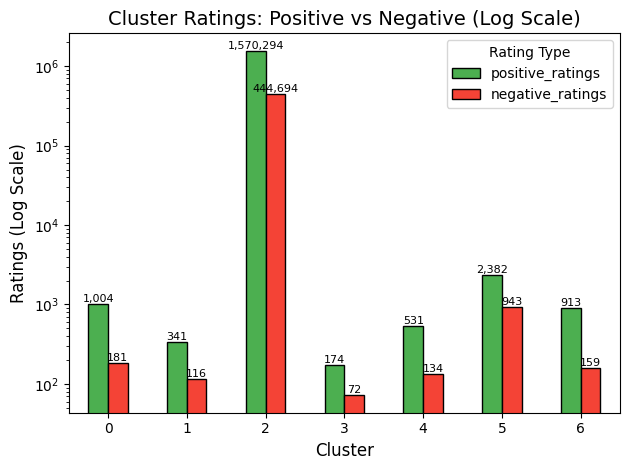

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume cluster_means is already calculated like this:
cluster_means = data_Hierarchical.groupby('Cluster')[['positive_ratings', 'negative_ratings']].mean()

plt.figure(figsize=(10, 6))
ax = cluster_means[['positive_ratings', 'negative_ratings']].plot(
    kind='bar',
    color=['#4CAF50', '#F44336'],  # Green for positive, Red for negative
    edgecolor='black'
)
plt.yscale('log')  # Set y-axis to log scale to better handle wide value ranges
plt.title("Cluster Ratings: Positive vs Negative (Log Scale)", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Ratings (Log Scale)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Rating Type")
plt.tight_layout()

# Add data labels to each bar for clarity
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2.,
                height,
                f'{height:,.0f}',
                ha='center',
                va='bottom',
                fontsize=8)

plt.show()


Cluster Means:
          Action  Adventure  Casual  Free to Play  Gore  Indie  \
Cluster                                                         
0          7578       6479    7599          1049     0  12772   
1           674        220     640            67     0    994   
2             2          1       0             1     0      0   
3           453        314     129            19   374    469   
4            93        152     165            27    68    234   
5           283        164     138           292     7    243   
6          1100       1685     687             0     0   2294   

         Massively Multiplayer  Nudity   RPG  Racing  Sexual Content  \
Cluster                                                                
0                            4       0   168       1               0   
1                            0       0    54     817               0   
2                            1       0     0       0               0   
3                            0       0

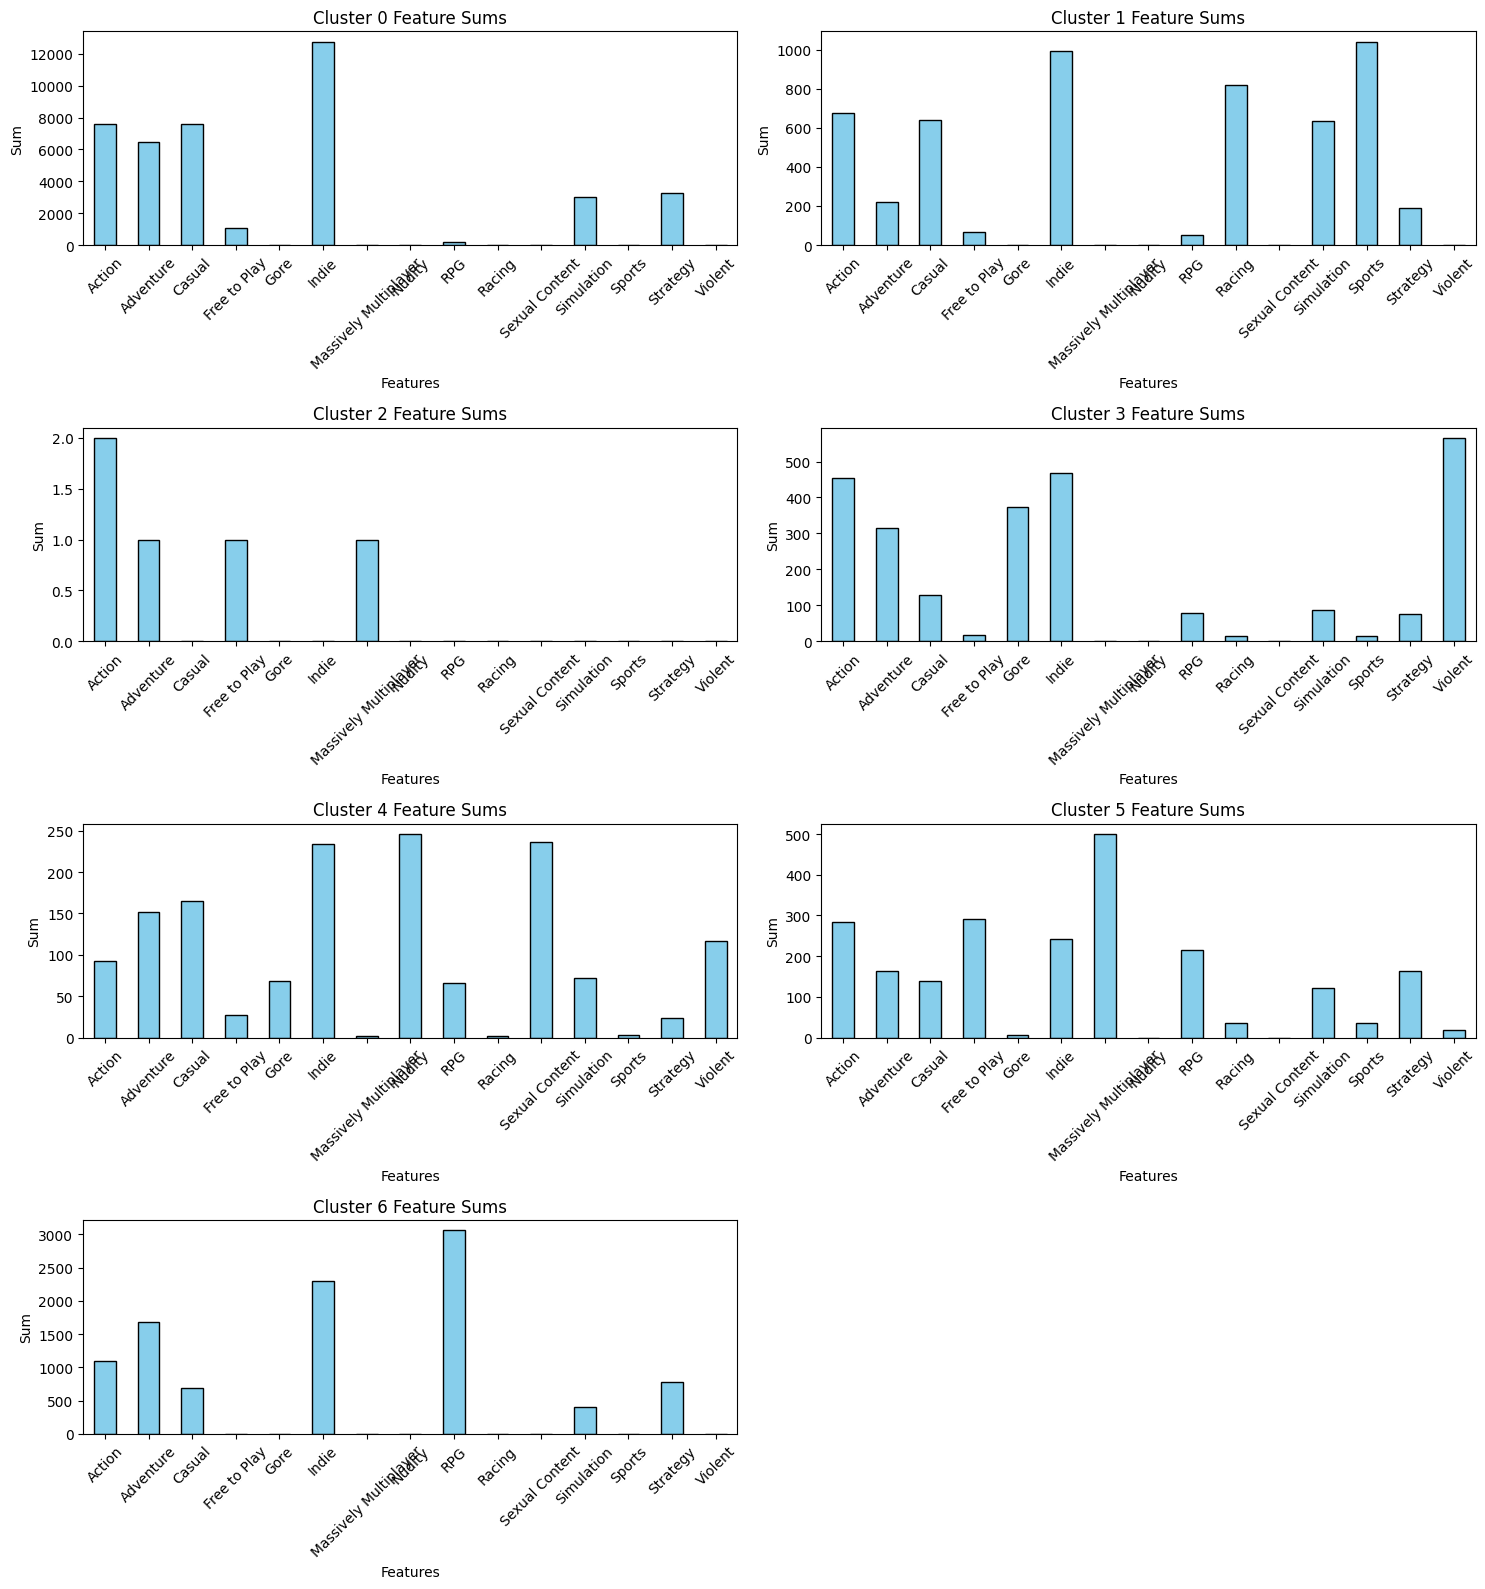

In [47]:
import matplotlib.pyplot as plt
import math

# Define your features list
featur = ['Action', 'Adventure', 'Casual', 'Free to Play', 'Gore', 'Indie',
          'Massively Multiplayer', 'Nudity', 'RPG', 'Racing', 'Sexual Content',
          'Simulation', 'Sports', 'Strategy', 'Violent']

# Calculate cluster sums (means can be used similarly)
cluster_means = data_Hierarchical.groupby('Cluster')[featur].sum()

# Print the cluster means for reference
print("Cluster Means:\n", cluster_means)

# Determine the number of clusters and set up the grid (here 2 columns)
num_clusters = len(cluster_means.index)
cols = 2
rows = math.ceil(num_clusters / cols)

# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot a bar chart for each cluster
for i, (cluster, row_data) in enumerate(cluster_means.iterrows()):
    ax = axes[i]
    row_data.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f'Cluster {cluster} Feature Sums')
    ax.set_xlabel('Features')
    ax.set_ylabel('Sum')
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

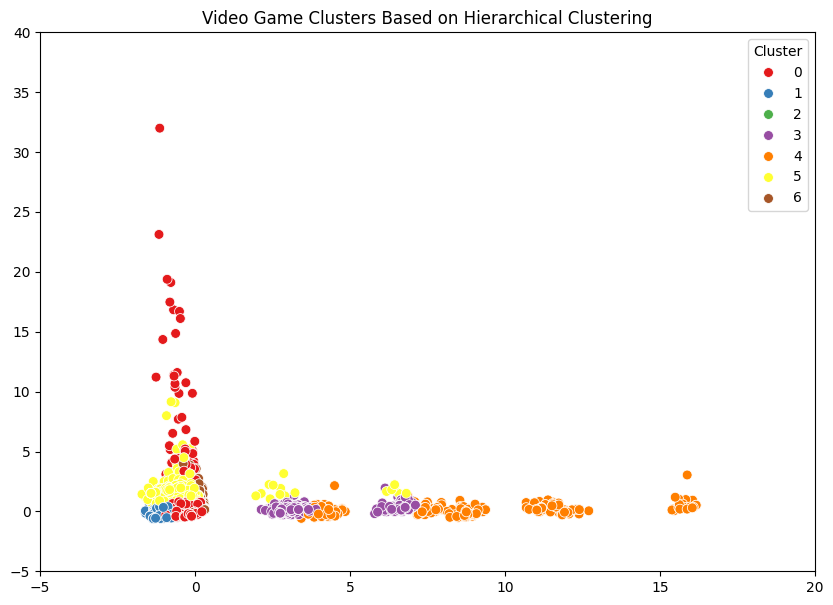

In [48]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data_Hierarchical['Cluster'], palette='Set1', s=50, alpha=1)
plt.title('Video Game Clusters Based on Hierarchical Clustering')
plt.xlim(-5, 20)
plt.ylim(-5, 40)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Cluster')
plt.show()

In [49]:
silhouette_avg = silhouette_score(reduced_data, data_Hierarchical['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: -0.0075
